<a href="https://colab.research.google.com/github/njaiganesh1994/ATTR_MISHMASH/blob/master/Attributes_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install opencv-python

In [0]:
import os
os.getcwd()
#from google.colab import drive
#drive.mount('/content/drive/')
os.getcwd()
os.chdir('/content/drive/My Drive')

In [1]:
!pip install mrcnn

In [2]:
!pip install tensorflow==1.9

In [0]:
import tensorflow
import cv2 

In [0]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt


In [0]:
def draw_boxes(filename, boxes_list):
     data = pyplot.imread(filename)
     pyplot.imshow(data)
     gy = pyplot.gca()
     for box in boxes_list:
          y1, x1, y2, x2 = box
          width, height = x2 - x1, y2 - y1
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          gy.add_patch(rect)
     pyplot.show()

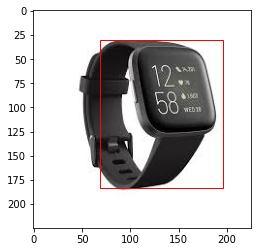

In [37]:
##

class Config(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=Config())
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)
# load photograph
img = load_img('Unknown.jpg')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# visualize the results
draw_boxes('Unknown.jpg', results[0]['rois'])

In [0]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

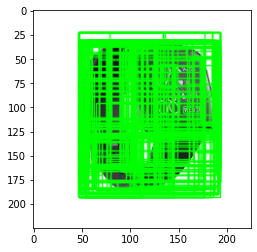

In [35]:
im = cv2.imread("Unknown.jpg")
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)